# Episode 7 - Basic MNIST with tf.contrib.learn

This code is tested against TensorFlow 0.10.0rc0. You can find a docker image here: https://hub.docker.com/r/tensorflow/tensorflow/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
learn = tf.contrib.learn
tf.logging.set_verbosity(tf.logging.ERROR)

## Import the dataset

In [2]:
mnist = learn.datasets.load_dataset('mnist')
data = mnist.train.images
labels = np.asarray(mnist.train.labels, dtype=np.int32)
test_data = mnist.test.images
test_labels = np.asarray(mnist.test.labels, dtype=np.int32)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST-data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz


There are 55k examples in train, and 10k in eval. You may wish to limit the size to experiment faster. 

In [3]:
max_examples = 10000
data = data[:max_examples]
labels = labels[:max_examples]

## Display some digits

In [4]:
def display(i):
    img = test_data[i]
    plt.title('Example %d. Label: %d' % (i, test_labels[i]))
    plt.imshow(img.reshape((28,28)), cmap=plt.cm.gray_r)    

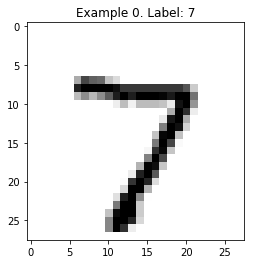

In [5]:
display(0)

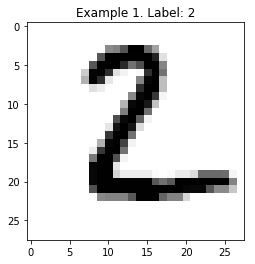

In [6]:
display(1)

These digits are clearly drawn. Here's one that's not.

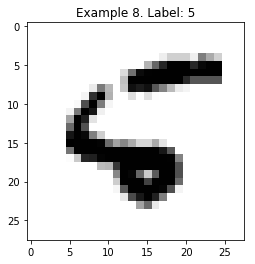

In [7]:
display(8)

Now let's take a look at how many features we have.

In [9]:
print(len(data[0]))

784


## Fit a Linear Classifier

Our goal here is to get about 90% accuracy with this simple classifier. For more details on how these work, see https://www.tensorflow.org/versions/r0.10/tutorials/mnist/beginners/index.html#mnist-for-ml-beginners

In [10]:
feature_columns = learn.infer_real_valued_columns_from_input(data)
classifier = learn.LinearClassifier(feature_columns=feature_columns, n_classes=10)
classifier.fit(data, labels, batch_size=100, steps=1000)

C:\Users\iLenovo\Anaconda2\envs\tensorflow\lib\site-packages\tensorflow\python\util\deprecation.py:247: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


LinearClassifier(params={'gradient_clip_norm': None, 'feature_columns': [_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None)], 'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x000001AA80468CC0>, 'joint_weights': False, 'optimizer': None})

## Evaluate accuracy

In [11]:
classifier.evaluate(test_data, test_labels)
print(classifier.evaluate(test_data, test_labels)["accuracy"])

C:\Users\iLenovo\Anaconda2\envs\tensorflow\lib\site-packages\tensorflow\python\util\deprecation.py:247: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


0.9137


## Classify a few examples

We can make predictions on individual images using the predict method

In [21]:
# here's one it gets right
print ("Predicted %d, Label: %d %"classifier.predict(test_data[0]), test_labels[0])
display(0)

SyntaxError: invalid syntax (<ipython-input-21-ec1eb4bd1a80>, line 2)

Predicted 6, Label: 5


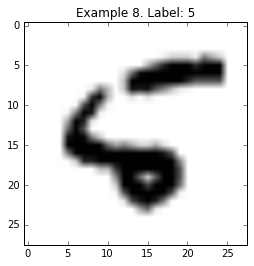

In [13]:
# and one it gets wrong
print ("Predicted %d, Label: %d" % (classifier.predict(test_data[8]), test_labels[8]))
display(8)

## Visualize learned weights


Let's see if we can reproduce the pictures of the weights in the TensorFlow Basic MNSIT <a href="https://www.tensorflow.org/tutorials/mnist/beginners/index.html#mnist-for-ml-beginners">tutorial</a>. 

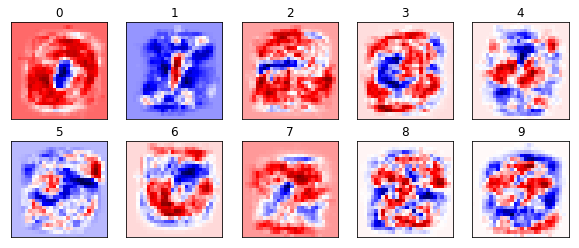

In [22]:
weights = classifier.weights_
f, axes = plt.subplots(2, 5, figsize=(10,4))
axes = axes.reshape(-1)
for i in range(len(axes)):
    a = axes[i]
    a.imshow(weights.T[i].reshape(28, 28), cmap=plt.cm.seismic)
    a.set_title(i)
    a.set_xticks(()) # ticks be gone
    a.set_yticks(())
plt.show()

# Next steps

* TensorFlow Docker images: https://hub.docker.com/r/tensorflow/tensorflow/ 
* TF.Learn Quickstart: https://www.tensorflow.org/versions/r0.9/tutorials/tflearn/index.html
* MNIST tutorial: https://www.tensorflow.org/tutorials/mnist/beginners/index.html
* Visualizating MNIST: http://colah.github.io/posts/2014-10-Visualizing-MNIST/
* Additional notebooks: https://github.com/tensorflow/tensorflow/tree/master/tensorflow/tools/docker/notebooks
* More about linear classifiers: https://www.tensorflow.org/versions/r0.10/tutorials/linear/overview.html#large-scale-linear-models-with-tensorflow
* Much more about linear classifiers: http://cs231n.github.io/linear-classify/
* Additional TF.Learn samples: https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples/skflow